In [ ]:
import PIL
import ephem
import datetime
import matplotlib         as    mpl
import pylab              as    pl
import numpy              as    np
import matplotlib.pyplot  as    plt
import matplotlib.patches as    patches

from   IPython.display   import Image
from   matplotlib        import animation, rc
from   IPython.display   import HTML
from   PIL               import Image as PImage
from   IPython.display   import YouTubeVideo

In [ ]:
%matplotlib inline

# De los Mayas a DESI

Desde el 1800 a. C. hasta el 900 d. C., la civilización Maya se destacó en agricultura, alfarería, escritura de jeroglíficos, elaboración de calendarios y matemáticas. Localizados en los actuales Honduras, México, Guatemala y Belice, y con un legado asombroso de arquitectura y obras de arte simbólicas, su formidable entendimiento de los cielos es quizá lo más impresionante, ¡sin duda para nosotros!

Los mayas eran expertos observadores del cielo; espectadores cuidadosos de los movimientos de los cuerpos celestes. Una prueba de la fascinación maya por la astronomía está tallada en piedra en los grandes sitios arquitectónicos de Chichén Itzá, Uxmal, Uaxactun, Edzna, Palenque y muchos más. Como veremos, a menudo los edificios que adornan se han construido para alinearse con eventos astronómicos cíclicos significativos: solsticios, equinoccios, la luna cambiante o el pasar de los planetas.

<img src="images/ChichenItza.jpg" alt="Drawing" style="width: 800px;"/>

En Chichén Itzá, dos estructuras dan testimonio de la astronomía maya: Kukulkan y El Caracol. Kukulkan, o El Castillo, es una pirámide de piedra en el centro de Chichén Itzá de 79 pies (24 m). Cada año, decenas de miles de visitantes acuden en masa a Chichén Itzá para ver 'la serpiente', una aparición hecha de sombras que desciende por las escaleras de El Castillo durante los equinoccios solares de cada primavera y otoño.

Este famoso evento ocurre dos veces al año, en los equinoccios de primavera y otoño. (De hecho, el efecto se puede ver durante una semana antes y después de cada equinoccio). A medida que se pone el sol del equinoccio, un juego de luces y sombras crea la apariencia de una serpiente que se ondula gradualmente por las escaleras de la pirámide. Esta serpiente con espalda de diamante se compone de siete sombras triangulares, proyectadas por las terrazas escalonadas de la pirámide. El sol poniente parece dar vida a las sinuosas sombras, que trazan un patrón decididamente serpenteante en su camino por las escaleras.

In [ ]:
YouTubeVideo('Zvv9EnBuem4', width=800, height=400)

Usando el increíble paquete Ephem, ¡veamos cómo funciona esto! Primero definiremos nuestro sol y el planeta favorito de los mayas, Venus. Estas 'class instances' nos permiten, por ejemplo, preguntar más adelante en qué posición se encuentra el sol en un momento dado.

In [ ]:
venus = ephem.Venus()
sun   = ephem.Sun()

venus.compute('2020/09/11 00:50:22')

print(venus.ra, venus.dec, ephem.constellation(venus)[1])

¡Entonces Venus está en la constelación de Cáncer esta noche! También definimos la posición (latitud y longitud de nuestro astrónomo maya). Las coordenadas predeterminadas del _Mayastronomer_ son las de El Castillo en Chichen Itza, pero ten la libertad de elegir las tuyas.

In [ ]:
mayastronomer         = ephem.Observer()

# Latitud y longitud ordinarias del astronomo Mayan. Por defecto las coordinates son las de El Castillo en Chichen Itza.
mayastronomer.lat     = '20.683056'
mayastronomer.lon     = '-88.568611'

# 
mayastronomer.horizon = 0.0

Ahora, descubramos más sobre la posición del Sol para diseñar nuestra pirámide. Definamos las siguientes funciones que calculan el ángulo azimutal en el que el Sol se pone o sale en el horizonte durante los dos equinoccios (cuando el día y la noche duran lo mismo) o los dos solsticios (el día con la noche más larga o más corta del año).

In [ ]:
def solar_position(year, date=None, event="next_rise", ephem_event=ephem.next_equinox):
    if date != None:
        # Regresa la posición del sol en un evento de fecha conocida
        mayastronomer.date = date
        
        sun.compute(mayastronomer)
        
        return  sun.az, sun.alt 
               
    else:
        # Determina el día y la posición azimutal del sol para un evento dado, ej. solsticio o equinoccio. 
        if event == "next_rise":
            mayastronomer.date = mayastronomer.next_rising(sun, start=ephem_event(year), use_center=True)

        elif event == "prev_setting":
            mayastronomer.date = mayastronomer.previous_setting(sun, start=ephem_event(year), use_center=True)
    
        elif event == "next_setting":
            mayastronomer.date = mayastronomer.next_setting(sun, start=ephem_event(year), use_center=True)
        
        else:
            raise  ValueError("Evento inaceptable!")
        
        sun.compute(mayastronomer)
 
        return  ephem.localtime(mayastronomer.date), sun.az

Elige un año (para construir / visitar tu pirámide) y evaluemos las funciones previamente definidas en ese año.

In [ ]:
year                 = '2021'

saz, salt            = solar_position(date='551/12/22 16:45:40', year='2021')

# Hora y posición azimutal del sol naciente y poniente en el equinoccio - día en el que duración de la noche = duración del día.
equinox_rise         = solar_position(year, event="next_rise", ephem_event=ephem.next_equinox)
equinox_set          = solar_position(year, event="prev_setting", ephem_event=ephem.previous_equinox)

# Hora y posición azimutal del sol naciente y poniente en el solsticio de invierno, el día más corto del año.
winter_solstice_set  = solar_position(year, event="next_setting", ephem_event=ephem.previous_solstice)
winter_solstice_rise = solar_position(year, event="next_rise", ephem_event=ephem.previous_solstice)

# Hora y posición azimutal del sol naciente y poniente en el solsticio de verano, el día más largo del año.
summer_solstice_set  = solar_position(year, event="next_setting", ephem_event = ephem.next_solstice)
summer_solstice_rise = solar_position(year, event="next_rise", ephem_event = ephem.next_solstice)

Antes de elaborar un diseño de pirámide, aprendamos más sobre la pirámide original que queremos imitar. La estructura del Castillo en su conjunto parece estar alineada con un eje astronómico importante: el plano oeste de la pirámide hace frente al pasaje cenital durante el atardecer. Mientras tanto, cada una de las cuatro escaleras (extremadamente empinadas) que suben a la pirámide tiene 91 escalones, con un escalón final en la parte superior para un total de 365, la cantidad de días en un año solar. Noventa y uno es también el número de días que separan cada una de las cuatro fases del ciclo solar anual: solsticio de invierno, equinoccio de primavera, solsticio de verano y equinoccio de otoño.

Necesitamos algunas líneas rectas y la forma aérea de nuestra pirámide, así que algunas definiciones más.

In [ ]:
#Ecuación de la línea recta
def line(x,m):
    return np.tan(-m+np.pi/2)*x


#Dibuja una linea y su descripción
def draw_lines(x,y,text=None):
    for i in range(3):
        ax.plot(x,y[i])
        
        ax.scatter(x[4],y[i][4],marker='o',color='black')
        ax.scatter(x[25],y[i][25],marker='o',color='black')
        
        if text!=None:
            ax.text(x[4]+5,y[i][4]+1,text[i][0], ha='center')
            ax.text(x[25]-5,y[i][4]+1,text[i][1], ha='center')

#Dibuja el Castillo 
def draw_kukulkan(ax):
    for i in range (2,10):
        j=12-i
        if (j==3):rectangle=patches.Rectangle((-j,-j),2*j,2*j, color='black', alpha=0.5)
        else: rectangle=patches.Rectangle((-j,-j),2*j,2*j, color='red', alpha=0.2)
        t = mpl.transforms.Affine2D().rotate_deg_around(0,0,angle) + ax.transData
        rectangle.set_transform(t)
        ax.add_patch(rectangle)
            #ax.add_patch(rectangle2)

    for i in range (4):
        a=[[-1.5,3],[-1.5,-11],[3,-1.5],[-11,-1.5]]
        if i<=1:rectangle=patches.Rectangle((a[i]),3,8, color='black', alpha=0.5)
        else:rectangle=patches.Rectangle((a[i]),8,3, color='black', alpha=0.5)
        t = mpl.transforms.Affine2D().rotate_deg_around(0,0,angle) + ax.transData
        rectangle.set_transform(t)
        ax.add_patch(rectangle)

Ahora calculemos el ángulo relevante para nuestro diseño y algunas trayectorias de rayos de luz durante la puesta de sol.

In [ ]:
x         = np.linspace(-30,30,30)
y         = [line(x,equinox_rise[1]),line(x,summer_solstice_set[1]),line(x,summer_solstice_rise[1])]

angle     =(-summer_solstice_rise[1]+np.pi/4)/np.pi*180
anglerad  = -summer_solstice_rise[1]+np.pi/4

rayshighx = np.array([x[4],10*(-np.cos(anglerad)-np.sin(anglerad))])
rayshighy = np.array([y[2][4],10*(np.cos(anglerad)-np.sin(anglerad))])
rayslowx  = np.array([x[4],10*(np.cos(anglerad)+np.sin(anglerad))])
rayslowy  = np.array([y[2][4],10*(-np.cos(anglerad)+np.sin(anglerad))])

Antes de colocar el diseño de la pirámide, necesitamos la referencia de solisticios y equinoccios en la posición del Mayastrónomo.

In [ ]:
fig1,ax= plt.subplots(figsize=(7,7))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)
text=[["Equinoccio de primavera/otoño\nAmanecer \n%s"%equinox_rise[0].strftime("%d/%m/%Y %H:%M:%S"),"Equinoccio de primavera/otoño\nAtardecer \n%s" %equinox_set[0].strftime("%d/%m/%Y %H:%M:%S")],
     ["Solsticio de verano\nAmanecer - Junio 21\n%s"%summer_solstice_rise[0].strftime("%d/%m/%Y %H:%M:%S"),"Solsticio de verano\nAtardecer - Junio 21\n%s"%summer_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S")],
    ["Solsticio de invierno\nAmanecer - Dic. 21\n%s"%winter_solstice_rise[0].strftime("%d/%m/%Y %H:%M:%S"),"Solsticio de invierno\nAtardecer - Dic. 21\n%s" %winter_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S")]]

draw_lines(x,y,text=text)
    
circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)
plt.show()

Hora de colocar el diseño de la pirámide en el sitio y alinearlo con el eje del solsticio de invierno.

In [ ]:
fig2,ax= plt.subplots(figsize=(7,7))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

#lineas de referencia
text=[["Amanecer\nEquinoccios","Atardecer\nEquinoccios"],
      ["Amanecer\nJunio 21","Atardecer\nJunio 21"],["Amanecer\nDic. 21","Atardecer\nDic. 21"]]
draw_lines(x,y,text=text)

#Dibujar pirámide
circle=patches.Circle((0,0),radius=4, color='cyan', alpha=1)
ax.add_patch(circle)
draw_kukulkan(ax=ax)

plt.show()

Observe los rayos de luz del sol en la puesta del sol del solsticio de invierno.

In [ ]:
fig3,ax= plt.subplots(figsize=(7,7))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

#lineas de referencia
draw_lines(x,y,text=text)

#Dibujar pirámide
draw_kukulkan(ax=ax)

#Dibujar rayos de luz
ax.fill(np.append(rayshighx, rayslowx[::-1]),np.append(rayshighy, rayslowy[::-1]), color='yellow', alpha=0.2)
ax.text(x[4],y[2][4]-7,"Atardecer - %s\nMedia pirámide en completa oscuridad" %winter_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S"))
plt.show()

Ahora el famoso espectáculo: cuando el sol se pone en los equinoccios de primavera y otoño, Kukulkan (que significa _serpiente emplumada_ en maya) desciende por la escalera norte.

In [ ]:
fig4,ax= plt.subplots(figsize=(7,7))
ax.set_xlim(-25,25)
ax.set_ylim(-25,25)

#Lineas de referencia
draw_lines(x,y,text=text)
#Dibujar pirámide
draw_kukulkan(ax=ax)

#Dibujar rayos de luz
for i in range(6):
            raystairsx=np.array([x[4],-1.5*np.cos(anglerad)-(11-i*1.5)*np.sin(anglerad)])
            raystairsy=np.array([y[0][4],(11-i*1.5)*np.cos(anglerad)-1.5*np.sin(anglerad)])
            ax.plot(raystairsx,raystairsy,'y-')
            
ax.text(x[4],y[1][4]+5,"Puesta Sol - %s\n Los siete triángulos de luz" %summer_solstice_set[0].strftime("%d/%m/%Y %H:%M:%S"))
plt.show()

Finalmente, veamos cómo se compara tu diseño con la pirámide de Kukulkan. ¿Se mueve mucho El Castillo? Vuelve arriba para establecer nuevas coordenadas para el _mayastronomer_, incluidas las ubicaciones en el hemisferio norte / sur. ¿Cuándo obtienes una diferencia significativa?

In [ ]:
fig5,ax= plt.subplots(figsize=(7,6))

img= plt.imread("images/kukulkan.png") #imagen original de Chichen Itze de Google Maps
ax.imshow(img)

# Alineación de tu diseño piramidal
rectangle=patches.Rectangle((188,178),190,190, color='red', alpha=0.5) 
t = mpl.transforms.Affine2D().rotate_deg_around(294,264,-angle+0*45) + ax.transData
rectangle.set_transform(t)
ax.add_patch(rectangle)

ax.text(120,70,"Chichen Itza: 20.6829703, -88.5692032\nYour location: {}, {}".format(mayastronomer.lat, mayastronomer.lon), backgroundcolor='white')
plt.show()

A minutos de Kukulkan se encuentra el Observatorio 'El Caracol', fue fundamental para el negocio de la Astronomía Maya, donde las observaciones de Venus eran de (casi) importancia religiosa.

<img src="images/caracol.jpg" alt="Drawing" style="width: 800px;"/>

El Caracol, como la pirámide de Kukulkan, estaba cuidadosamente alineado con los movimientos de Venus, ya que "él" (este género usaban los mayas) tenía un significado tremendo; este brillante planeta era considerado el gemelo del sol y un dios de la guerra. Los líderes mayas utilizaron la posición cambiante de Venus para planificar tiempos apropiados para incursiones y batallas. En el Caracol, apodado 'el Observatorio', ventanas estrechas en forma de eje enmarcan importantes eventos astronómicos. Una de esas ventanas marca la aparición de Venus en un punto particular del horizonte que tiene lugar, como un reloj, una vez cada ocho años.

Usemos ephem para observar y comprender a Venus, como lo hicieron los mayas en el Caracol.

In [49]:
# Fecha y hora de primer aparición:  2020/1/2 03:01:29
# Primer amanecer;  print(chichen_itza.previous_rising(sun))

# Definir nuestra primera observación en Enero 1, 2020 a las 23:52 y un poquito más!
start_date         = datetime.datetime(2020, 1,   1)
start_time         = datetime.time(23, 52, 2)
start_datetime     = datetime.datetime.combine(start_date.date(), start_time)

# Calcularemos la posición de Venus hasta el 2030. 
end_date           = datetime.datetime(2030, 1, 1)

# cada hora 
delta              = datetime.timedelta(hours=1)

# guardemos la fecha y hora de 'cada observación'
datetimes          = []

# Guarda la posición angular.
angular_pos        = []

# Almacenará la [magnitud (brillo), diámetro en segundos de arco, distancia desde la Tierra, fase y separación
# de Venus desde el sol en grados (alargamiento o alargamiento)].
props              = []

# Guarde la hora del amanecer de cada día.
sunrises           = []

while start_datetime  <= end_date:    
    start_datetime += delta
    
    # Establece nuestra fecha y hora de observación.
    mayastronomer.date    = start_datetime.strftime("%Y/%m/%d %H:%M:%S")

    # Calcula todo del sol y venus
    sun.compute(mayastronomer)
    venus.compute(mayastronomer)
    
    datetimes.append(start_datetime)

    props.append([venus.mag, venus.size, venus.earth_distance, venus.phase, venus.elong])
    
    # alt o altitud es la altura del sol y Venus sobre el horizonte en grados. ¡Una altitud de 90 grados estaría 
    # justo encima tuyo! Esto también se conoce como el "cenit" entre los profesionales.
    angular_pos.append([mayastronomer.date, sun.alt, venus.az, venus.alt])

    sunrises.append(mayastronomer.previous_rising(sun))
    
    # print('{} \t {:f} \t {:f} \t {} \t {}'.format(chichen_itza.date, venus.az, venus.alt, chichen_itza.next_rising(venus), chichen_itza.next_transit(venus)))

In [50]:
# Hemos estado recopilando cosas en 'listas' (lists), pero convertirlas en matrices de numpy es mucho más fácil para hacer cálculos.
angular_pos = np.array(angular_pos)
props       = np.array(props)
sunrises    = np.array(sunrises)

In [51]:
# Convertimos los radianos en grados
angular_pos[:,1:] *= 180. / np.pi

In [52]:
# sunrises (amaneceres) es una serie de números que representan la fecha y hora de la observación, donde un número mayor es
# una observación posterior. Aquí, vamos a empezar con el reloj en el momento en que veamos que Venus y el sol están muy juntos.
sunrises   -= 44567

In [53]:
# Una lista de los colores de las líneas que trazaremos.
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

Text(567, 0.75, 'Conjuncción\n Inferior')

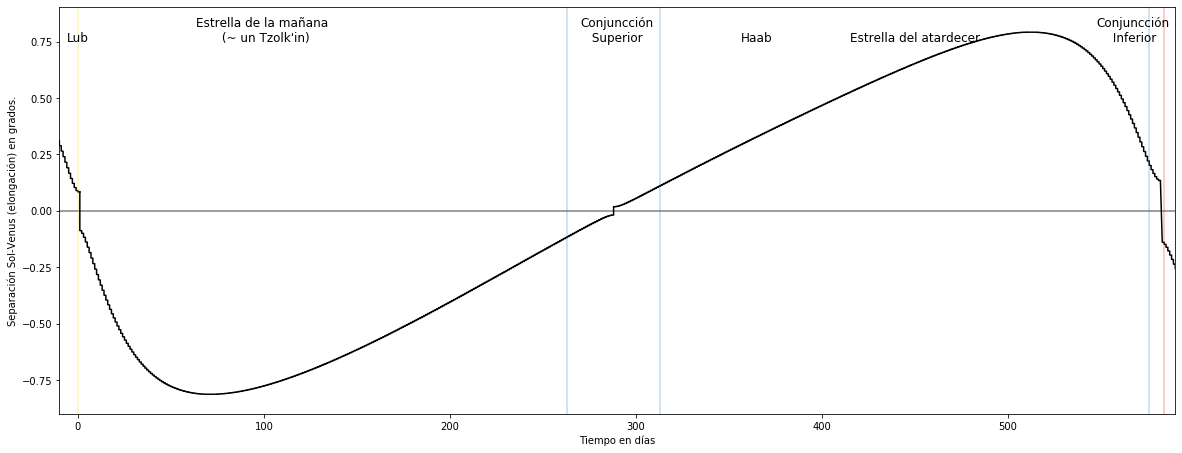

In [56]:
fix, ax     = plt.subplots(1, 1, figsize=(20, 7.5))  

# http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html    
ax.plot(sunrises, props[:,-1], c='k')
    
ax.set_xlabel('Tiempo en días')
ax.set_ylabel('Separación Sol-Venus (alargamiento) en grados.')

ax.set_xlim(left=-10, right=590)
    
ax.axhline(0.0, alpha=0.5, c='k')
    
ax.axvline(0.,   lw=0.4, c ='gold')
ax.axvline(263., lw=0.4)
ax.axvline(313., lw=0.4)
ax.axvline(576., lw=0.4)
ax.axvline(584., lw=0.4, c='red')
    
ax.text(x=0,   y=0.75, s='Lub', horizontalalignment='center', fontsize=12)
ax.text(x=100, y=0.75, s='Estrella de la mañana \n (~ un Tzolk\'in)', horizontalalignment='center', fontsize=12)
ax.text(x=290, y=0.75, s='Conjuncción\n Superior ', horizontalalignment='center', fontsize=12)
ax.text(x=365, y=0.75, s='Haab', horizontalalignment='center', fontsize=12)
ax.text(x=450, y=0.75, s='Estrella del atardecer', horizontalalignment='center', fontsize=12)
ax.text(x=567, y=0.75, s='Conjuncción\n Inferior', horizontalalignment='center', fontsize=12)
    
# pl.savefig('images/venus.pdf')

Para los mayas, ¡esta fue una curva increíblemente especial, tanto así, que diseñaron (uno de) sus calendarios, el Tzolk'in, basándose en él! Este calendario comenzaría en el Lub, cuando Venus estaba tan cerca del sol ('alargamiento' $\simeq 0.0$) que estaría completamente oculto. Pronto, mientras observaba el horizonte cerca de la salida del sol todos los días, Venus se convertiría en una 'Estrella de la Mañana'. Venus se elevaría por encima del horizonte hasta unas pocas horas antes de que el brillo del Sol lo ahogara. ¿Por qué no levantarse temprano un día y verlo?

Venus continuaría siendo una estrella de la mañana durante 263 días, momento en el que los caminos del Sol y Venus estarían tan cerca cada día que el brillo del Sol lo protegería por completo. En astronomía amateur y profesional, esto se conoce como la 'Conjunción Superior', que dura 50 días. La duración de 263 días de la Estrella de la Mañana continuaría para definir el año Tzolk'in.

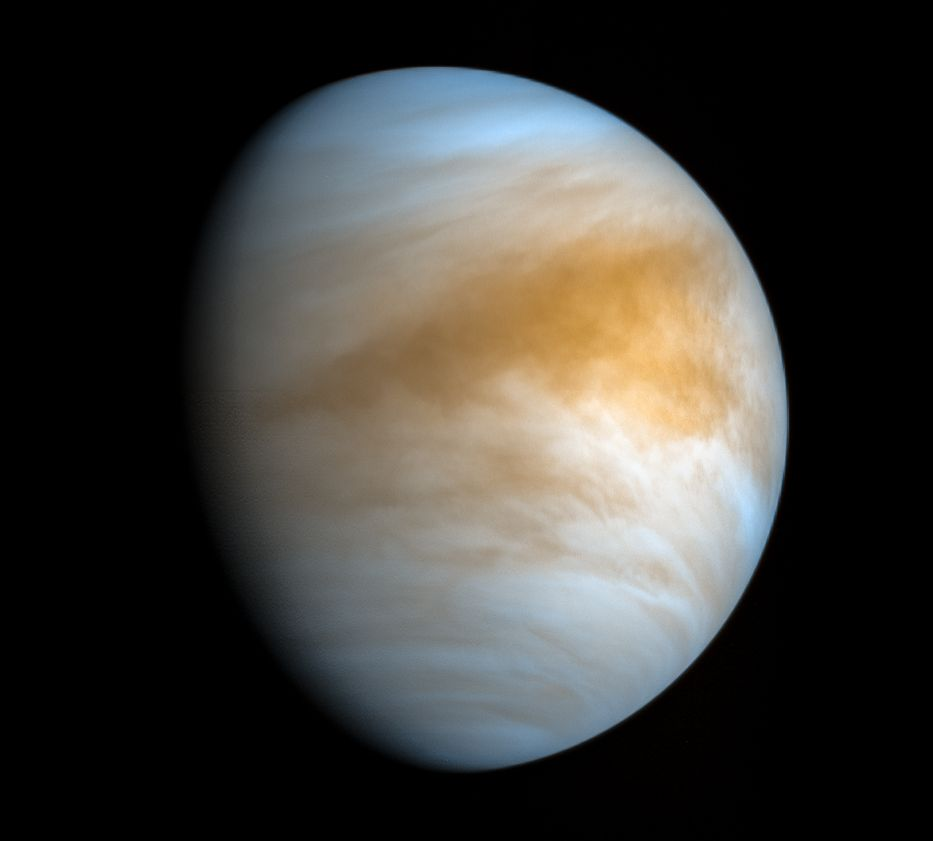

In [22]:
Image(filename='images/venus.jpg')

¡Llevamos 365 días, un año para nosotros o un Haab para los Mayas! En este punto, Venus es una 'estrella vespertina'. Ahora del otro lado del Sol, Venus está siguiendo al Sol en el cielo y se ilumina a la vista poco después de que el Sol se pone, cuando el cielo está lo suficientemente oscuro como para ser visible. Cuando Venus está en su punto más brillante, se vuelve visible minutos después de que el Sol se pone.

La 'conjunción Inferior' cierra el 'período sinódico' de Venus, exactamente igual que el superior pero por 8 días mucho más cortos. Al final del período sinódico, 584 días, el día de Ground Hog comienza de nuevo para Venus, cuando todo se repite.

Tan complicado es el acto de desaparición de Venus que los antiguos Griegos lo malinterpretaron como dos estrellas diferentes. Los Mayas lo entendieron mejor y reconocieron a Venus, tanto en el cielo de la mañana como en el de la tarde, como el mismo.

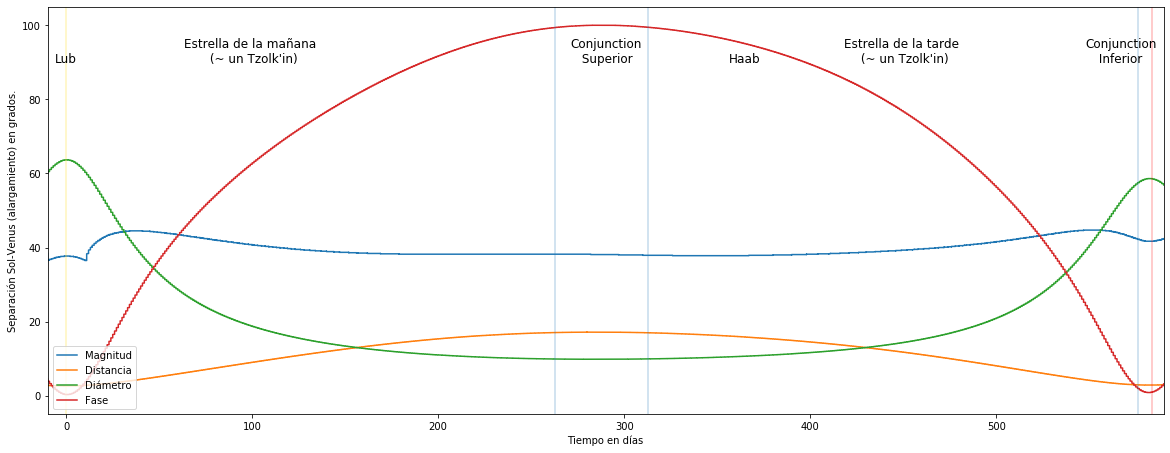

In [58]:
fix, ax     = plt.subplots(1, 1, figsize=(20, 7.5))  

# http://articles.adsabs.harvard.edu//full/1991JRASC..85..291W/0000299.000.html    
ax.plot(sunrises, -10. * props[:,0], label='Magnitud')
ax.plot(sunrises,  10. * props[:,2], label='Distancia')
ax.plot(sunrises,        props[:,1], label='Diámetro')
ax.plot(sunrises,        props[:,3], label='Fase')    
    
ax.set_xlabel('Tiempo en días')
ax.set_ylabel('Separación Sol-Venus (alargamiento) en grados.')

ax.set_xlim(left=-10, right=590)
        
ax.axvline(0.,   lw=0.4, c ='gold')
ax.axvline(263., lw=0.4)
ax.axvline(313., lw=0.4)
ax.axvline(576., lw=0.4)
ax.axvline(584., lw=0.4, c='red')
    
yy = 90.
    
ax.text(x=0,   y=yy, s='Lub', horizontalalignment='center', fontsize=12)
ax.text(x=100, y=yy, s='Estrella de la mañana \n (~ un Tzolk\'in)', horizontalalignment='center', fontsize=12)
ax.text(x=290, y=yy, s='Conjunction\n Superior', horizontalalignment='center', fontsize=12)
ax.text(x=365, y=yy, s='Haab', horizontalalignment='center', fontsize=12)
ax.text(x=450, y=yy, s='Estrella de la tarde \n (~ un Tzolk\'in)', horizontalalignment='center', fontsize=12)
ax.text(x=567, y=yy, s='Conjunction\n Inferior ', horizontalalignment='center', fontsize=12)

ax.legend(frameon=True, loc=3)

Es un hecho que el período sinódico de Venus (584 días) se relaciona con el período orbital de la tierra (365 días), en una proporción relativamente simple de 5:8. Cinco veces el período sinódico de Venus (5 x 584 días) son 2920 días. Si divide 2920 entre los 365 días de nuestro año, se obtiene 8. En resumen, los movimientos de Venus en relación con nuestro sol se repiten casi exactamente cada 8 años. Ocho años fue un intervalo fundamental para los antiguos mayas, que dependían en gran medida de los ciclos naturales.

¡Veamos cómo los mayas registraron esto en el año 500 d.C.!

In [59]:
# Calcularemos la posición angular de Venus para cada uno de los cinco ciclos sinódicos (584 días) que se requieren para que las cosas se repitan.
cycles        = {}

In [60]:
for i in range(5):
  zero        = 584. * i

  # El sol está por arriba del horizonte
  in_cycle    = (sunrises >= zero)        & (sunrises < zero + 585.) & (angular_pos[:,1] > 0.)

  in_morning  = (sunrises >= zero)        & (sunrises < zero + 263.) & (angular_pos[:,1] > 0.)
  in_superior = (sunrises >= zero + 263.) & (sunrises < zero + 313.) & (angular_pos[:,1] > 0.)
  in_evening  = (sunrises >= zero + 313.) & (sunrises < zero + 576.) & (angular_pos[:,1] > 0.)
  in_inferior = (sunrises >= zero + 576.) & (sunrises < zero + 584.) & (angular_pos[:,1] > 0.)

  cycles[i]   = [in_morning, in_superior, in_evening, in_inferior]

In [63]:
labels        = ['Estrella de la mañana', 'Superior', 'Estrella de la tarde', 'Inferior'] 

def plot_mayan(cycle, epoch, ext=None):
  fig, ax     = plt.subplots(1, 1, figsize=(15, 5.))

  im          = PImage.open('images/Mayan_Morning_{}.png'.format(cycle))  
    
  width, height = im.size

  size        = 256, 256
  im.thumbnail(size, PImage.ANTIALIAS)

  im          = np.array(im).astype(np.float) / 255 

  color       = color_cycle[cycle]
  sample      = cycles[cycle][epoch]
  label       = labels[epoch]

  # for i, (color, sample, label) in enumerate(zip(color_cycle, cycles[j], labels)):
  ax.plot(angular_pos[sample,2],    angular_pos[sample,3],    c=color, lw=0.0, marker='.', label=label)
  ax.plot(angular_pos[sample,2][0], angular_pos[sample,3][0], c='k', lw=0.0, marker='.')
  
  ax.legend(frameon=False, loc=1)
  
  ax.set_xlim(left=360., right=0.0)

  if ext is not None:
    title = 'Venus como la ' + label + ':  ' + ext

  else:
    title = 'Venus como la ' + label
    
  ax.set_title(title)
    
  fig.figimage(im, 320, 30)

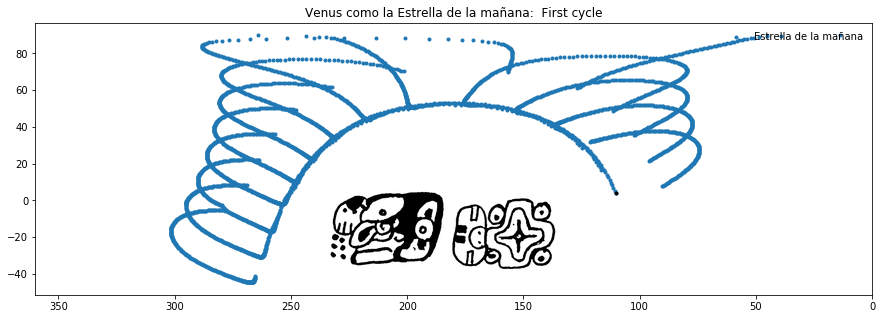

In [64]:
plot_mayan(0, 0, ext='Primer ciclo')

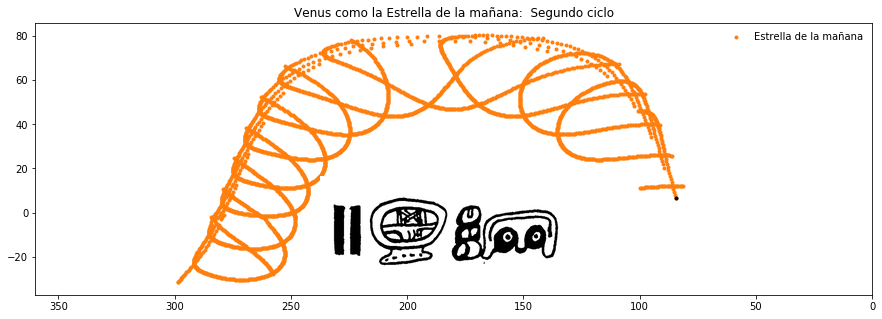

In [65]:
plot_mayan(1, 0, ext='Segundo ciclo')

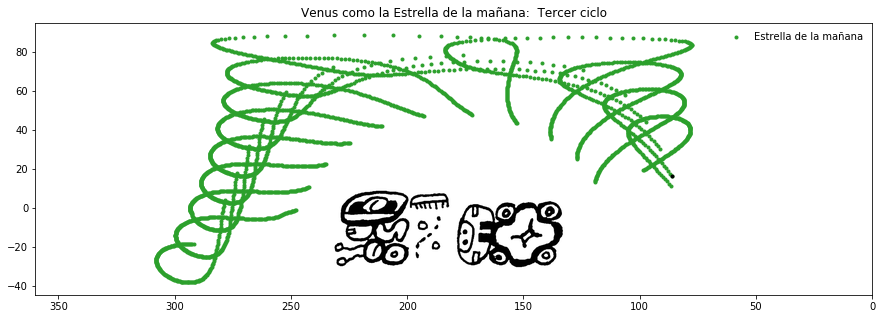

In [66]:
plot_mayan(2, 0, ext='Tercer ciclo')

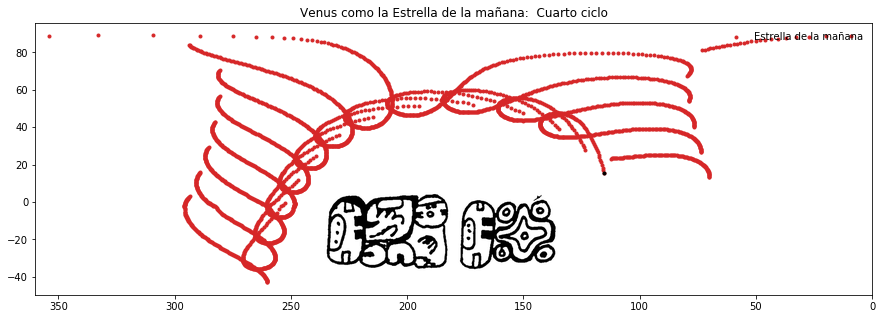

In [67]:
plot_mayan(3, 0, ext='Cuarto ciclo')

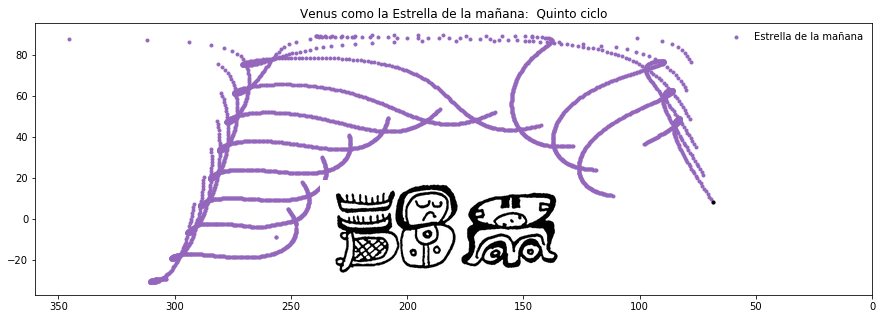

In [68]:
plot_mayan(4, 0, ext='Quinto ciclo')

En este punto, después de ocho años, Venus y el Sol regresan al mismo punto en el cielo y ¡la danza comienza de nuevo! Los mayas documentaron este comportamiento religiosamente, en lo que hoy se conoce como el Códice de Dresde:

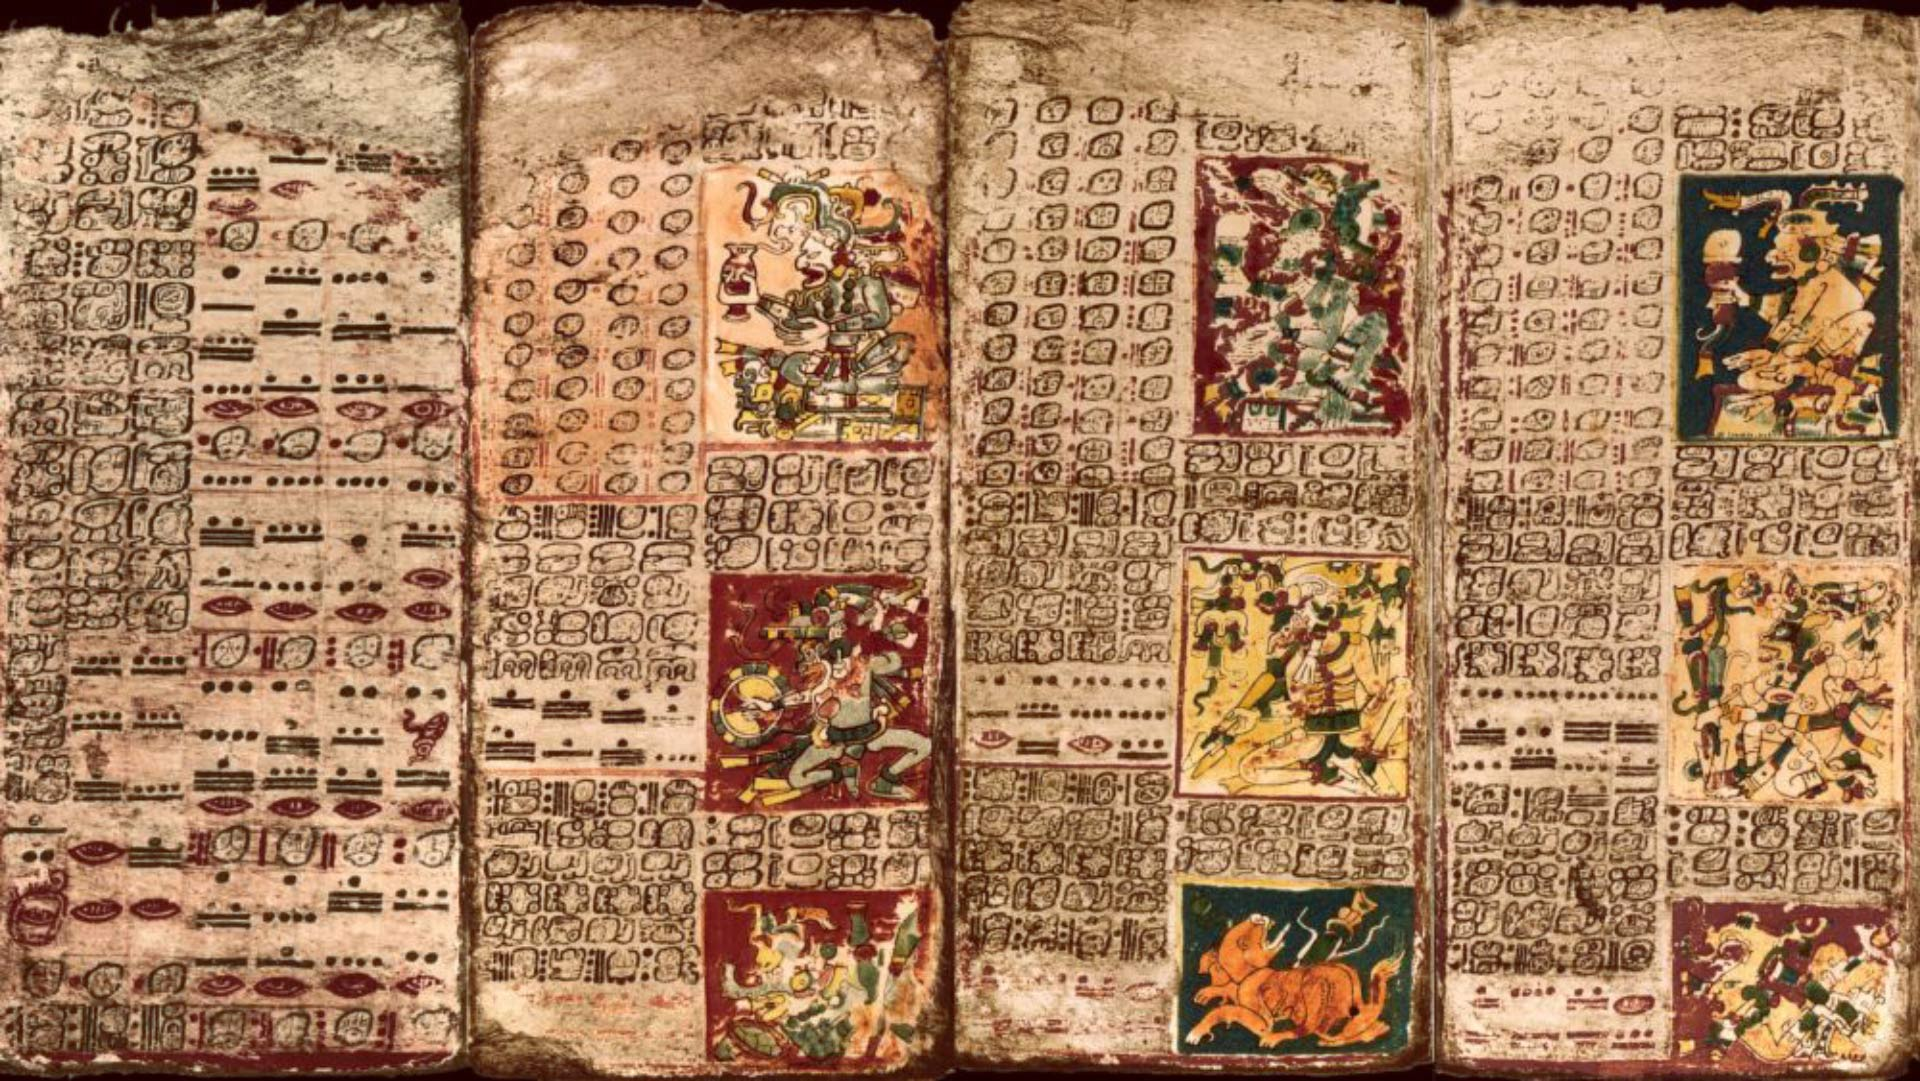

In [69]:
Image(filename='images/DresdenCodex.jpg')

En el Codex, página tras página, los Mayas registraron las fechas en las que Venus pasó de estrella matutina a conjunción superior, lucero vespertino, orden inferior, etc., con una precisión increíble. En comparación con la precisión moderna, a menudo erraban por uno o unos pocos días. Los mayas no hacían fracciones, por lo que era difícil atinarle exactamente.

Cada página tendría una fila de cuatro fechas, marcando estas transiciones. La misma fila en cinco páginas consecutivas registraría estas mismas transiciones para los cinco ciclos sinódicos (de 584 días) completando un Lub, o 2920 días, cuando el sol y Venus comenzarían la misma danza nuevamente.

Después de trece lubs, o 104 Haab (años), la mesa regresa a su Lubay o "gran lugar de descanso" donde todos los ciclos comienzan de nuevo: el sol y Venus han regresado a las posiciones iniciales el primer día de un año Tzolk'in. Entonces todo el ciclo se repite. El Universo debe haber parecido en perfecta armonía con su mundo en ese día de Ahaw cuando se alcanzó el Lubay y los trece ciclos de Venus comienzan de nuevo.

In [33]:
# print(365. * 104, 260 * 146., 584. * 65., 2920. * 13)

# NOTICIAS DE ÚLTIMO MOMENTO

¡Quizás los mayas tenían razón todo el tiempo! En un giro inesperado, el Lunes 14 de Septiembre de 2020, científicos anunciaron la primera evidencia de vida en Venus, ¡justo a tiempo para el Mes Nacional Hispano y el desafío DESI High!

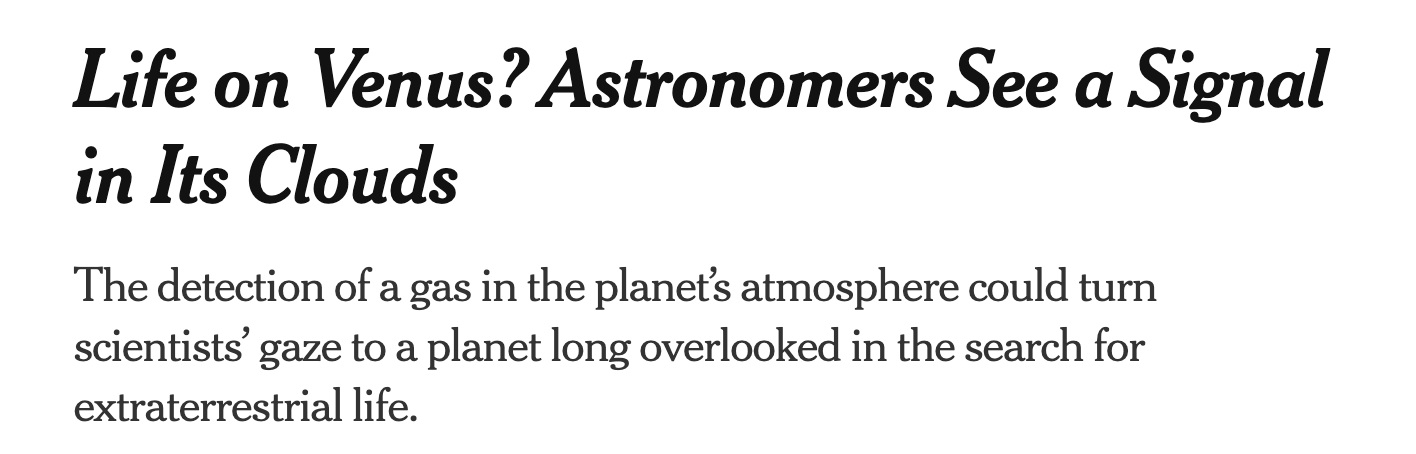

In [38]:
Image(filename='images/VenusLife.png')

Mira [aquí](https://www.nytimes.com/2020/09/14/science/venus-life-clouds.html) para aprender más al respecto.

# Hispanoamericanos en DESI

Este cuaderno es solo un ejemplo de lo que podrías hacer. Para mejorar, ¡nos gustaría que enviaras tu propio material! Eso podría agregarse al ejemplo Maya anterior usando pyephem, o bien, acercarse al trabajo de los primeros astrónomos profesionales hispanoamericanos o realizar un divertido experimento de python que resalte tu trabajo en DESI. Si envías una entrada, o incluso si no lo haces, te pedimos que agregues una introducción tuya de tus intereses en nuestra carpeta dedicada. Alma y Mariana, nuestras primeras traductoras de DESI High (¡gracias por eso!), han aportado ejemplos ([aquí](https://github.com/michaelJwilson/DESI-HighSchool/blob/master/Espanol/Profiles/example.md) y aquí) para mostrarte cómo hacerlo.

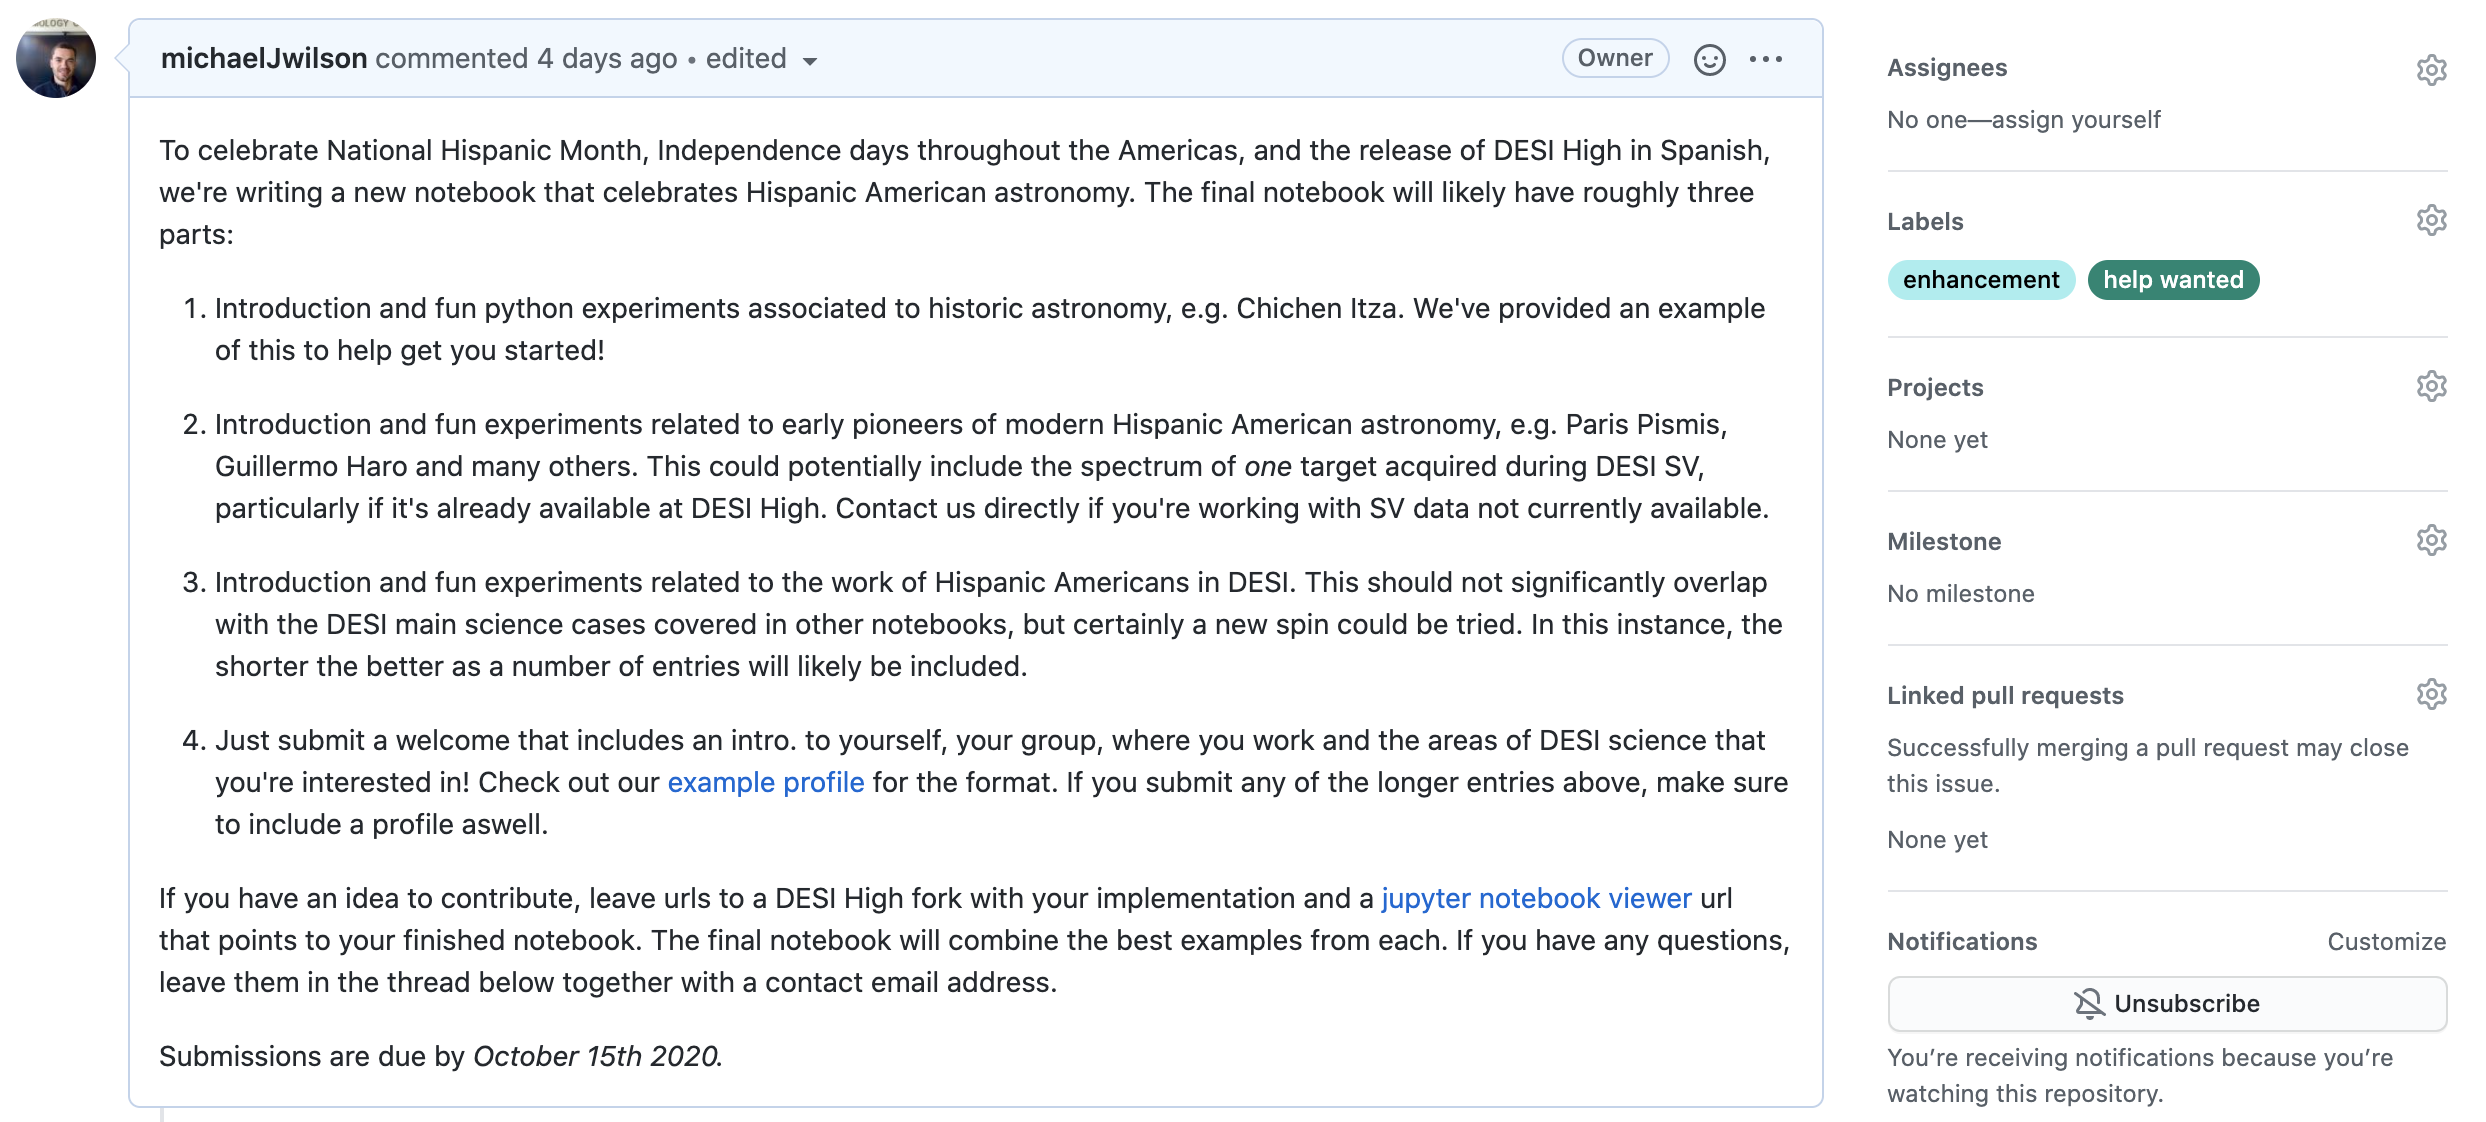

In [44]:
Image(filename='images/Challenge1.png')

¡Ve a https://github.com/michaelJwilson/DESI-HighSchool/issues/19 para empezar con el reto!